[Text(0.5, 1.0, 'Threading, Sub Interpreter and Multiprocessing Benchmark (n=60) Python 3.12.0a7+ (64-bit) revision e1dde486ef'),
 Text(0, 0.5, 'Mean Time for 100 executions (s)'),
 Text(0.5, 0, 'Model')]

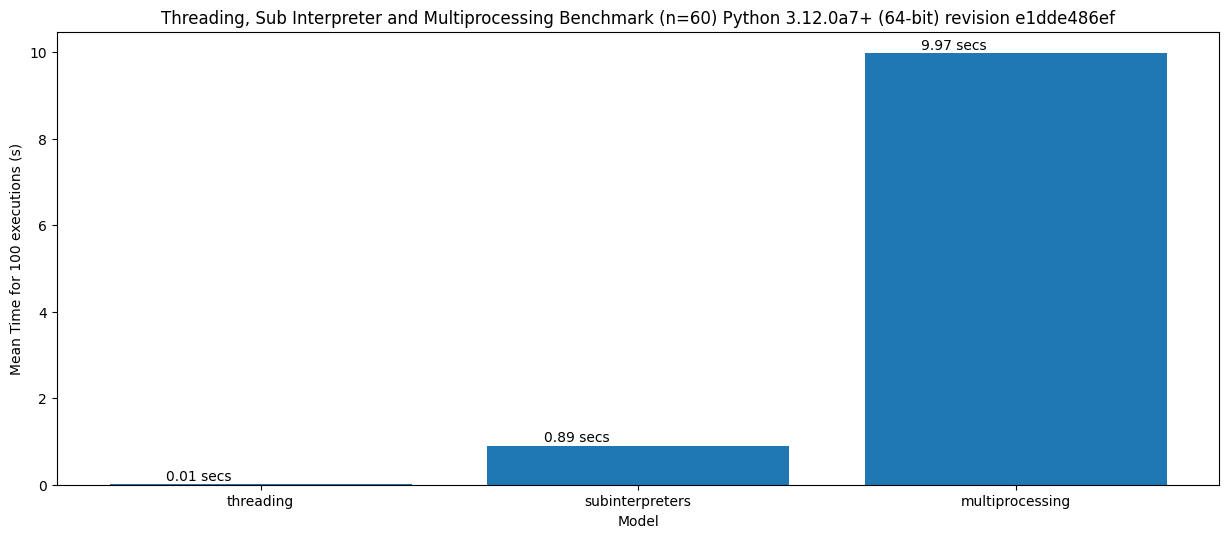

In [1]:
import json
import matplotlib.pyplot as plt
from statistics import mean

plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 100

def pyperf_to_runs(file):

    with open(file) as f:
        data = json.load(f)
        runs = {}
        for benchmark in data["benchmarks"]:
            run_times = []
            for run in benchmark["runs"]:
                if "values" in run:
                    run_times.extend(run["values"])
            runs[benchmark["metadata"]["name"]] = mean(run_times)
        python_version = data["metadata"]["python_version"]
    return runs, python_version, run_times

runs, python_version, run_times = pyperf_to_runs("test1.json")
# Create a bar chart of each run
plt.bar(runs.keys(), runs.values())

# put the value on top of the bar
for i, v in enumerate(runs.values()):
    plt.text(i - 0.25, v + 0.1, f"{round(v, 2)} secs", color='black')

plt.gca().set(title=f'Threading, Sub Interpreter and Multiprocessing Benchmark (n={len(run_times)}) Python {python_version}', ylabel='Mean Time for 100 executions (s)', xlabel='Model')

[Text(0.5, 1.0, 'Execution of Pi to 2000 digits concurrently 10 times on 4 Core CPU (n=60) Python 3.12.0a7+ (64-bit) revision e1dde486ef'),
 Text(0, 0.5, 'Mean Time for executions (s)'),
 Text(0.5, 0, 'Model')]

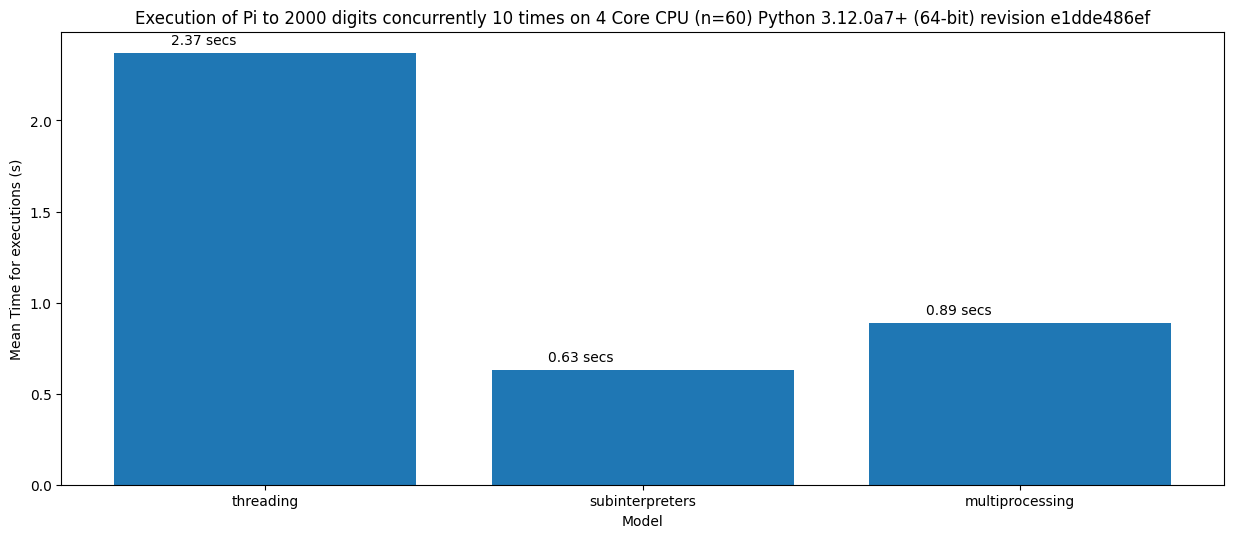

In [3]:
runs, python_version, run_times = pyperf_to_runs("test3.json")
# Create a bar chart of each run
plt.bar(runs.keys(), runs.values())

# put the value on top of the bar
for i, v in enumerate(runs.values()):
    plt.text(i - 0.25, v + 0.05, f"{round(v, 2)} secs", color='black')

plt.gca().set(title=f'Execution of Pi to 2000 digits concurrently 10 times on 4 Core CPU (n={len(run_times)}) Python {python_version}', ylabel='Mean Time for executions (s)', xlabel='Model')